## OpenCV

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

To display an image in a window, use the function cv2.imshow(winname, image) where the first argument is the Name of the window and second is the Image to be shown. So, this will first create a window named as image and displays the image in that window.

cv2.waitKey(delay) decides for how long the image will be displayed. Its argument delay is the time in milliseconds. If the delay is <=0, the image will be shown forever otherwise destroyed after delay milliseconds.

cv2.destroyAllWindows() simply destroys all the windows we created.

Special Case: We can create a window first and load the image to it later. Just write the below code line before the cv2.imshow() function.

In [23]:
img = cv2.imread(r'C:\Users\sethi\Downloads\anubhav.png',0)
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow("Anubhav",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

To save an image, use the function cv2.imwrite(filename, image) where the first argument is the file name with which we want to save the image file, the second argument is the image you want to save.

In [9]:
cv2.imwrite(r'C:\Users\sethi\Downloads\anubhav.png',img)

True

To access the pixel location, we must first know the shape of the image. This can be done by:-

It returns a tuple of the number of rows, columns, and channels (if the image is color).

In [11]:
img.shape

(1440, 720)

Total number of pixels can be found either by multiplying rows, columns, channels found using img.shape or by using the following command:-

In [12]:
img.size

1036800

After knowing the image shape, we can access the pixel location by its row and column coordinates as:

This returns the intensity value at that pixel location. For a greyscale image, intensity or pixel value is a single integer while for a color image, it is an array of Blue, Green, Red values.


In [14]:
img[250,250] #8-bit grayscale image

48

In [15]:
img[280:340, 330:390]

array([[174, 172, 174, ..., 254, 254, 254],
       [173, 172, 172, ..., 254, 254, 254],
       [171, 171, 172, ..., 254, 254, 254],
       ...,
       [168, 150, 111, ..., 254, 254, 254],
       [123,  93, 100, ..., 254, 254, 254],
       [105, 125, 150, ..., 254, 254, 254]], dtype=uint8)

In [16]:
#We know that intensity levels depend on the number of bits that can be found by
img.dtype

dtype('uint8')

You can change the color image to greyscale using the following command:

In [22]:
img1=cv2.imread(r'C:\Users\sethi\Downloads\anubhav.png')
grey = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
cv2.imshow("Anubhav",grey)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Image Enhancement 

According to MathWorks, Image enhancement is the process of adjusting digital images so that the results are more suitable for display or further image analysis. It is basically a preprocessing step.

Image enhancement can be done either in the spatial domain or transform domain. Spatial domain means we perform all operations directly on pixels while in transform domain we first transform an image into another domain (like frequency) do processing there and convert it back to the spatial domain by some inverse operations. We will be discussing these in detail in the next blogs.

In [25]:
import cv2
import numpy as np
# Load original image
img = cv2.imread(r'C:\Users\sethi\Downloads\anubhav.png')
# Create list to store noisy images
images = []
# Generate noisy images using cv2.randn. Can use your own mean and std.
for _ in range(20):
    img1 = img.copy() 
    cv2.randn(img1,(0,0,0),(50,50,50))
    images.append(img+img1)
# For averaging create an empty array, then add images to this array.
img_avg=np.zeros((img.shape[0],img.shape[1],img.shape[2]),np.float32)
for im in images:
    img_avg=img_avg+im/20
# Round the float values. Always specify the dtype
img_avg=np.array(np.round(img_avg),dtype=np.uint8)
# Display the images
cv2.imshow('average_image',img_avg)
cv2.imshow('original_image',img)
cv2.imshow('noise_image',images[1])
cv2.waitKey(0)

-1

## Image Negatives  

In [26]:
import cv2
import numpy as np
# Load the image
img = cv2.imread(r'C:\Users\sethi\Downloads\anubhav.png')
# Check the datatype of the image
print(img.dtype)
# Subtract the img from max value(calculated from dtype)
img_neg = 255 - img
# Show the image
cv2.imshow('negative',img_neg)
cv2.waitKey(0)

uint8


-1

### Log Transformation 

In [27]:
import cv2
import numpy as np
# Load the image
img = cv2.imread(r'C:\Users\sethi\Downloads\anubhav.png')
# Apply log transform
img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)
# Display the image
cv2.imshow('log_image',img_log )
cv2.imshow('original_img',img)
cv2.waitKey(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


-1

### Image contrasting 

In [ ]:
import cv2
import numpy as np

# Read the image
img1 = cv2.imread(r'C:\Users\sethi\Downloads\anubhav.png',0)

# Create zeros array to store the stretched image
minmax_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')

# Loop over the image and apply Min-Max formulae
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        minmax_img[i,j] = 255*(img1[i,j]-np.min(img1))/(np.max(img1)-np.min(img1))

# Displat the stretched image
cv2.imshow('Minmax',minmax_img)
cv2.waitKey(0)

### Iris dataset

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
Iris_data = pd.read_csv(r"C:\Users\sethi\Desktop\iris.csv")
Iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


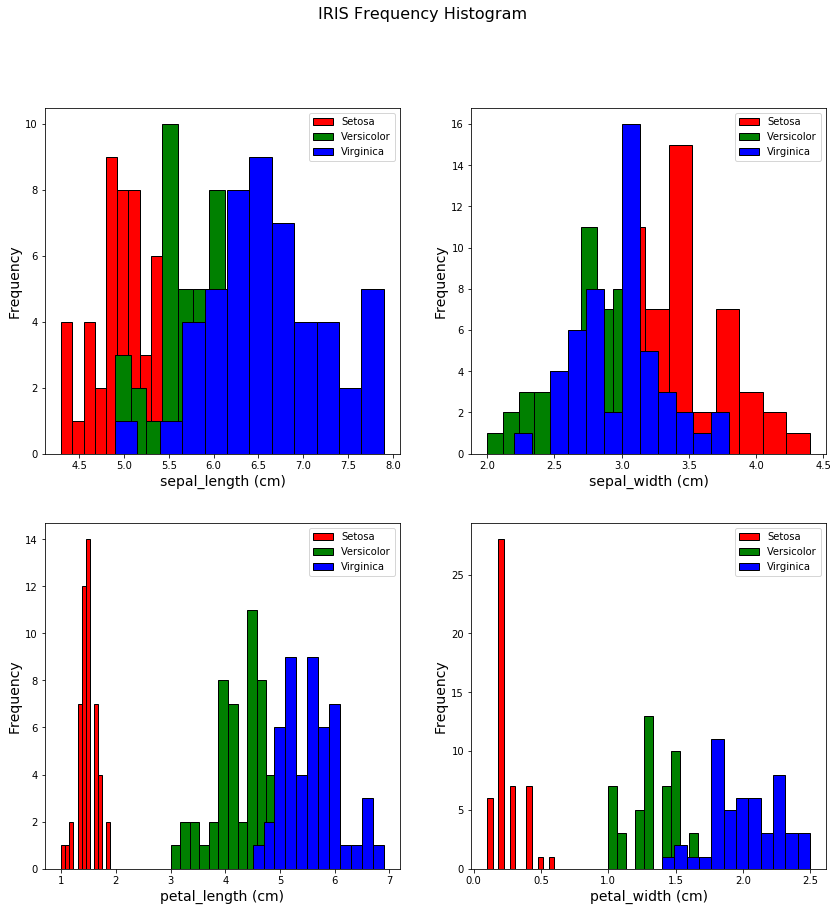

In [10]:
i=1
plt.figure(figsize=(14,14)).suptitle('IRIS Frequency Histogram',fontsize=16)
for col_name in Iris_data.columns[:-1]:
    plt.subplot(2,2,i)
    plt.hist(Iris_data.loc[Iris_data['species']=='setosa',col_name],bins=12,color='red',label='Setosa',edgecolor='black')
    plt.hist(Iris_data.loc[Iris_data['species']=='versicolor',col_name],bins=12,color='green',label='Versicolor',edgecolor='black')
    plt.hist(Iris_data.loc[Iris_data['species']=='virginica',col_name],bins=12,color='blue',label='Virginica',edgecolor='black')
    plt.ylabel('Frequency',fontsize=14)
    plt.xlabel(col_name+' (cm)',fontsize=14)
    plt.legend()
    i+=1
plt.show()

### Power Law Transformation 

In [4]:
import numpy as np
import cv2
# Load the image
img = cv2.imread(r'C:\Users\sethi\Downloads\anubhav.png')
# Apply Gamma=2.2 on the normalised image and then multiply by scaling constant (For 8 bit, c=255)
gamma_two_point_two = np.array(255*(img/255)**2.2,dtype='uint8')
# Similarly, Apply Gamma=0.4 
gamma_point_four = np.array(255*(img/255)**0.4,dtype='uint8')
# Display the images in subplots
img3 = cv2.hconcat([gamma_two_point_two,gamma_point_four])
cv2.imshow('anubhav',img3)
cv2.waitKey(0)

-1